# Breast Cancer Classification using Support Vector Machines

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

## Load the data

In [2]:
data = pd.read_csv("breast-cancer.csv")
X = data.drop(columns=["id", "diagnosis"])
y = data["diagnosis"]

## Feature Scaling

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Splitting the data into the Training set and Test set

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [5]:
print(X_train)

[[-1.15800874 -0.40948202 -1.1351621  ... -0.75548625 -0.01092926
  -0.40485783]
 [-0.94499809  0.62606285 -0.95474903 ... -0.605352    0.10393316
  -0.40596615]
 [ 0.57163772 -1.03080894  0.50791498 ... -0.02597997 -0.19859181
  -0.76616896]
 ...
 [-1.33239345 -0.22564372 -1.32422512 ... -0.97581512 -0.72275273
  -0.14329518]
 [-1.25173342 -0.24891439 -1.28674204 ... -1.74506282 -1.60444316
  -1.01720262]
 [-0.74334801  1.07984094 -0.71872918 ... -0.27523937 -1.2760337
   0.1869831 ]]


In [6]:
print(X_test)

[[-0.20656118  0.28631105 -0.13712355 ...  1.37791231  1.10695714
   1.49368807]
 [-0.26052388  1.3870138  -0.32412706 ... -0.83070565 -0.73893053
  -0.89030039]
 [-0.03047238 -0.84464357 -0.09799286 ... -0.49404558 -1.23720696
  -0.93352473]
 ...
 [ 1.71905507  0.05825847  1.72302589 ...  1.56367679  0.21232446
  -0.17709882]
 [ 1.18794852  0.30027345  1.18755329 ...  0.55415339  0.28027125
  -0.29458036]
 [ 0.2592221  -0.59332032  0.27848557 ... -0.1949952  -1.17087796
   0.08557215]]


In [7]:
print(y_train)

338    B
427    B
406    B
96     B
490    B
      ..
277    M
9      M
359    B
192    B
559    B
Name: diagnosis, Length: 455, dtype: object


In [8]:
print(y_test)

512    M
457    B
439    B
298    B
37     B
      ..
213    M
519    B
432    M
516    M
500    B
Name: diagnosis, Length: 114, dtype: object


## Training the SVM model on the Training set

In [9]:
classifier = SVC(kernel="linear", random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

## Predicting a new result

In [10]:
new_data = np.array([[30, 87000] + [0] * 28])
print("Prediction for new data: ", classifier.predict(scaler.transform(new_data)))

Prediction for new data:  ['M']


c:\Users\Gandharv Kulkarni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Predicting the Test set results

In [11]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

In [12]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [13]:
print("Confusion Matrix: ", cm)
print("Accuracy: ", accuracy)

Confusion Matrix:  [[66  1]
 [ 2 45]]
Accuracy:  0.9736842105263158


## Visualizing the Confusion Matrix

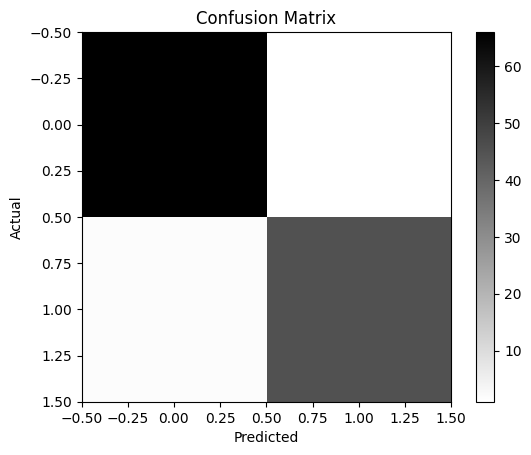

In [14]:
plt.imshow(cm, cmap = 'binary', interpolation = 'None')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Create a DataFrame and Save it to a CSV File

In [15]:
df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df.to_csv("predictions.csv", index = False)

<hr>